In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
pyber= pd.merge(city_data_df, ride_data_df, on="city")
pyber


# Display the data table for preview
pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

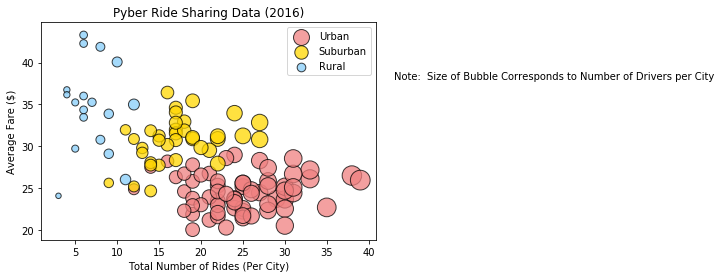

In [11]:
# Obtain the x and y coordinates for each of the three city types

#city_type=city_data_df.set_index(["type"])
urban= pyber.loc[(pyber["type"] == "Urban")]
rural= pyber.loc[(pyber["type"] == "Rural")]
suburban= pyber.loc[(pyber["type"] == "Suburban")]    
                     
urban_avg_fare = urban.groupby(["city"]).mean()["fare"] 
urban_total_ride = urban.groupby(["city"]).count()["ride_id"]
urban_driver_count = urban.groupby(['city'])['driver_count'].value_counts()

suburban_avg_fare = suburban.groupby(["city"]).mean()["fare"] 
suburban_total_ride = suburban.groupby(["city"]).count()["ride_id"]
suburban_driver_count = suburban.groupby(['city'])['driver_count'].value_counts()

rural_avg_fare = rural.groupby(["city"]).mean()["fare"] 
rural_total_ride = rural.groupby(["city"]).count()["ride_id"]
rural_driver_count = rural.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types
urban_plot = plt.scatter(urban_total_ride, urban_avg_fare, s = urban_driver_count*10, marker = "o", facecolor = "lightcoral", edgecolors = "black", label = "Urban", alpha = .75)
suburban_plot = plt.scatter(suburban_total_ride, suburban_avg_fare, s = suburban_driver_count*10, marker = "o", facecolor = "gold", edgecolors = "black", label = "Suburban", alpha = .75)
rural_plot = plt.scatter(rural_total_ride, rural_avg_fare, s = rural_driver_count*10, marker = "o", facecolor = "lightskyblue", edgecolors = "black", label = "Rural", alpha = .75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(handles = [urban_plot, suburban_plot, rural_plot], loc="best")                  

# Incorporate a text label regarding circle size
  
plt.text(43, 38, "Note:  Size of Bubble Corresponds to Number of Drivers per City")

# Save Figure
plt.savefig("../Pyber/bubbleplotimage")

In [12]:
# Show plot
plt.show()

## Total Fares by City Type

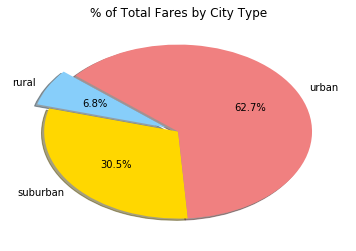

In [13]:
# Calculate Type Percents
pie_city_fare = pyber.groupby(["type"])["fare"].sum()

# Build Pie Chart
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1, 0, 0)
labels = ["rural", "suburban", "urban"]
plt.pie(pie_city_fare, labels = labels, autopct= "%1.1f%%", shadow=True, startangle=140, colors=colors, explode=explode)
plt.title("% of Total Fares by City Type")
        
# Save Figure
plt.savefig("../Pyber/cityfarepieimage")

In [14]:
# Show Figure
plt.show()

## Total Rides by City Type

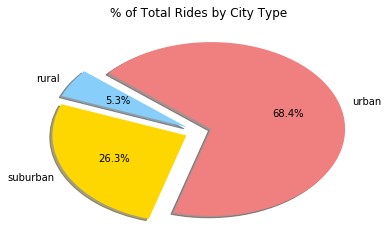

In [15]:
# Calculate Ride Percents
pie_city_totalrides = pyber.groupby(["type"]).count()["ride_id"]

        
# Build Pie Chart
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1, 0.1, 0.1)
labels = ["rural", "suburban", "urban"]
plt.pie(pie_city_totalrides, labels = labels, autopct= "%1.1f%%", shadow=True, startangle=140, colors=colors, explode=explode)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Pyber/citytotalridesimage")

In [16]:
# Show Figure
plt.show()

## Total Drivers by City Type

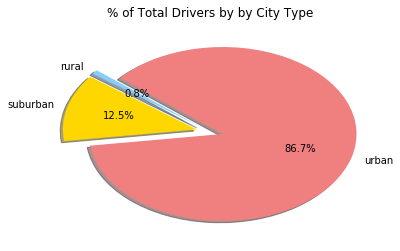

In [17]:
# Calculate Driver Percents
pie_driver_count = pyber.groupby(["type"])["driver_count"].sum()

# Build Pie Charts
colors = ["lightskyblue", "gold","lightcoral"]
explode = (0.1, 0.1, 0.1)
labels = ["rural", "suburban", "urban"]
plt.pie(pie_driver_count, labels = labels, autopct= "%1.1f%%", shadow=True, startangle=140, colors=colors, explode=explode)
plt.title("% of Total Drivers by by City Type")

# Save Figure
plt.savefig("../Pyber/citytotaldriversimage")

In [9]:
# Show Figure
plt.show()